In [1]:
import pandas as pd
import numpy as np

In [3]:
Bike_stations = pd.read_csv(r'C:\Users\rekha\Downloads\Bike_stations.csv')
Bike_stations.head()

,Station Name,Latitude,Longitude,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,18
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,8
2,Queen St E / Rhodes Ave,43.666224,-79.317693,15
3,Bond St / Queen St E,43.653236,-79.376716,2
4,Church St / Alexander St,43.663722,-79.380288,17


In [6]:
# renaming lattitude and longitude column to avoid confusion with restaurant data
Bike_stations = Bike_stations.rename(columns={'Latitude': 'station_lat',
                                              'Longitude': 'station_lon'})
Bike_stations.head()

,Station Name,station_lat,station_lon,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,18
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,8
2,Queen St E / Rhodes Ave,43.666224,-79.317693,15
3,Bond St / Queen St E,43.653236,-79.376716,2
4,Church St / Alexander St,43.663722,-79.380288,17


In [7]:
indian_restaurant= pd.read_csv(r'C:\Users\rekha\Downloads\indian_restaurant.csv')
indian_restaurant

,Latitude,Longitude,name,distance,address,telephone,rating,open_true
0,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,True
1,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,True
2,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,False
3,43.676566,-79.456089,Honorary Consulate of the Kingdom of Cambodia ...,995,"60 Caledonia Rd, Toronto ON M6E 4S4",(647) 533-9335,NaN,False
4,43.677961,-79.443916,Pizza e Pazzi,733,"1182 Saint Clair Ave W, Toronto ON M6E 1B4",(647) 352-7882,8.1,False
...,...,...,...,...,...,...,...,...
1814,43.638768,-79.416315,Maurya East Indian Cuisine - Liberty Village,661,"150 E Liberty St, Toronto ON M6K 3R5",(647) 347-7002,NaN,True
1815,43.638479,-79.417204,Brazen Head Irish Pub,697,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.2,True
1816,43.667943,-79.385626,Kothur Indian Cuisine,747,"649 Yonge St, Toronto ON M4Y 1Z9",(416) 926-0953,7.8,False
1817,43.661085,-79.385750,Colaba Junction,339,"801 Bay St, Toronto ON M5S 1Y9",(416) 646-8800,6.4,True


In [9]:
#renaming latitude and longitude column to avoid confusion with bike_station data
indian_restaurant = indian_restaurant.rename(columns={'Latitude': 'restaurant_lat',
                                              'Longitude': 'restaurant_lon'})
indian_restaurant.head()

,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,True
1,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,True
2,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,False
3,43.676566,-79.456089,Honorary Consulate of the Kingdom of Cambodia ...,995,"60 Caledonia Rd, Toronto ON M6E 4S4",(647) 533-9335,NaN,False
4,43.677961,-79.443916,Pizza e Pazzi,733,"1182 Saint Clair Ave W, Toronto ON M6E 1B4",(647) 352-7882,8.1,False


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

# Explanation :

Joining the dataframes to generate a unified result within SQLite, importing outcomes from the established database. Review the Data Visualization in Database section for details.

In [10]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory)

In [46]:
# creating our database into project file
connection = create_connection(r'C:\Users\rekha\Statistical_Modelling-_Python_lhl\api.db')


Connection to SQLite DB successful


In [47]:
# insert data from Bike_station dataframe
Bike_stations.to_sql('Bike_stations', connection, if_exists='replace', index=False)

759

In [48]:
# insert data from indian_restaurant dataframe
indian_restaurant.to_sql('indian_restaurant', connection, if_exists='replace',index=False)

1819

In [49]:
# commit changes
connection.commit()

In [50]:
# create a cursor object to execute SQL queries
cursor = connection.cursor()

In [51]:
try:
    # create a cursor object to execute SQL queries
    cursor = connection.cursor()

    # Execute the spatial join SQL query
    query = """
        SELECT bs.*, ir.*
        FROM Bike_stations AS bs
        JOIN indian_restaurant AS ir
        ON (
            ((ir.restaurant_lat - bs.station_lat) * (ir.restaurant_lat - bs.station_lat) +
            (ir.restaurant_lon - bs.station_lon) * (ir.restaurant_lon - bs.station_lon)) <= (1.0 / 111.32) * (1.0 / 111.32)
        )
    """
    print("Executing query:", query)

    # Fetch the results
    cursor.execute(query)
    results = cursor.fetchall()

    # Print the number of rows fetched
    print("Number of rows fetched:", len(results))

    # Check if there are results
    if results:
        # Create a DataFrame with the results
        result_df = pd.DataFrame(results, columns=[column[0] for column in cursor.description])
        print(result_df)
    else:
        print("No matching rows found.")

except sqlite3.Error as e:
    print(f"SQLite error: {e}")



Executing query: 
        SELECT bs.*, ir.*
        FROM Bike_stations AS bs
        JOIN indian_restaurant AS ir
        ON (
            ((ir.restaurant_lat - bs.station_lat) * (ir.restaurant_lat - bs.station_lat) +
            (ir.restaurant_lon - bs.station_lon) * (ir.restaurant_lon - bs.station_lon)) <= (1.0 / 111.32) * (1.0 / 111.32)
        )
    
Number of rows fetched: 39740
                                     Station Name  station_lat  station_lon  \
0                       Queen St E / Woodward Ave    43.665269   -79.319796   
1                       Queen St E / Woodward Ave    43.665269   -79.319796   
2                       Queen St E / Woodward Ave    43.665269   -79.319796   
3                       Queen St E / Woodward Ave    43.665269   -79.319796   
4                       Queen St E / Woodward Ave    43.665269   -79.319796   
...                                           ...          ...          ...   
39735  Queen's Park Cres E / Grosvenor St - SMART    43.6618

# This code helps find bike stations and Indian restaurants that are close to each other based on their geographical locations
# The purpose of a spatial join is to find records from both tables that satisfy a spatial condition, in this case, the proximity of bike stations to Indian restaurants based on their latitude and longitude.
# It can be useful for understanding which restaurants are near bike stations, possibly for offering services related to  biking, such as food delivery or recommendations for cyclists.
# For the database structure, it's essential to have tables with columns storing the geographical coordinates (latitude and longitude) for both bike stations and Indian restaurants, allowing for effective spatial analysis.

In [52]:
# create a dataframe from the result
result_df = pd.DataFrame(result, columns=[column[0] for column in cursor.description])

In [53]:
result_df

,Station Name,station_lat,station_lon,Bikes Available,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,1
1,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,1
2,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,0
3,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672665,-79.321041,Udupi Palace,752,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,1
4,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672278,-79.322523,Motimahal Restaurant Ltd,767,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39735,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.661085,-79.385750,Colaba Junction,635,"801 Bay St, Toronto ON M5S 1Y9",(416) 646-8800,6.4,1
39736,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.657050,-79.384874,Matagali Restaurant,408,"69 Elm St (Bay), Toronto ON M5G 1H2",(416) 599-9994,5.8,1
39737,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.667943,-79.385626,Kothur Indian Cuisine,747,"649 Yonge St, Toronto ON M4Y 1Z9",(416) 926-0953,7.8,0
39738,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.661085,-79.385750,Colaba Junction,339,"801 Bay St, Toronto ON M5S 1Y9",(416) 646-8800,6.4,1


In [54]:
#inserting the data back into database
result_df.to_sql('Result', connection, if_exists='replace', index=False)

39740

In [82]:
# close the database connection
connection.close()

# Visualize Data
# Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization

In [55]:
result_df.shape

(39740, 12)

In [56]:
result_df.duplicated().sum()

538

In [57]:
result_df = result_df.drop_duplicates()

In [58]:
result_df.shape

(39202, 12)

In [59]:
result_df.describe()

,station_lat,station_lon,Bikes Available,restaurant_lat,restaurant_lon,distance,rating,open_true
count,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,24829.000000,39202.000000
mean,43.657833,-79.389818,8.459084,43.657971,-79.389942,587.061502,7.181957,0.812357
std,0.016209,0.029498,6.732425,0.016020,0.029355,267.736718,0.670516,0.390432
min,43.588077,-79.550404,0.000000,43.592701,-79.552782,12.000000,5.500000,0.000000
25%,43.646677,-79.399586,3.000000,43.647963,-79.397257,373.000000,6.800000,1.000000
50%,43.655227,-79.388910,7.000000,43.655637,-79.388877,605.000000,7.200000,1.000000
75%,43.665527,-79.379498,12.000000,43.666889,-79.378688,819.000000,7.800000,1.000000
max,43.778112,-79.185218,39.000000,43.786314,-79.184858,1949.000000,9.000000,1.000000


In [60]:
import matplotlib.pyplot as plt

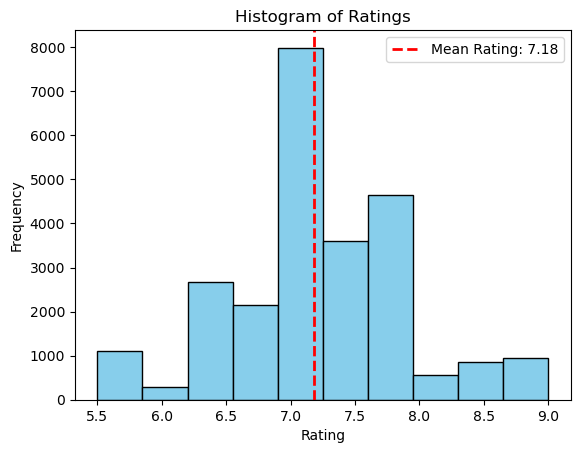

In [61]:
# create histogram of rating column
plt.hist(result_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# calculate and display the mean rating
mean_rating = result_df['rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth = 2, label=f"Mean Rating: {mean_rating:.2f}")
plt.legend()

plt.show()

In [62]:
result_df.isnull().sum()

Station Name           0
station_lat            0
station_lon            0
Bikes Available        0
restaurant_lat         0
restaurant_lon         0
name                   0
distance               0
address                0
telephone           2130
rating             14373
open_true              0
dtype: int64

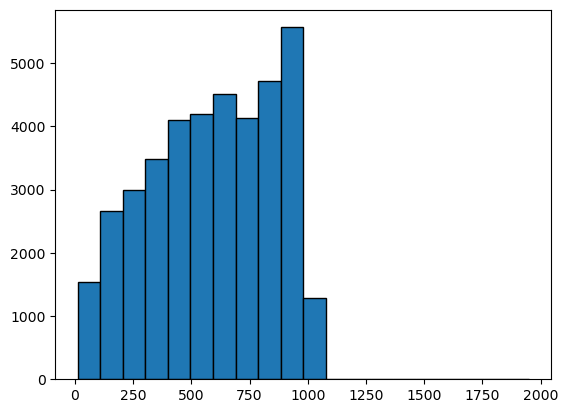

In [67]:
# create histogram of rating column
plt.hist(result_df['distance'], bins=20, edgecolor='k')

plt.show()

In [68]:
restaurant_counts = result_df['name'].value_counts()
restaurant_counts

name
Little India Restaurant               3450
My Roti Place                         2749
Aroma Fine Indian Cuisine             2596
Bindia Indian Bistro                  2120
Colaba Junction                       2107
                                      ... 
Radiance Restaurant & Banquet Hall       1
Ghareeb Nawaz Restaurant                 1
Hakka No.1 Restaurant                    1
Raj Mahal Indian Cuisine                 1
Phoenix Pan Asian Cuisine                1
Name: count, Length: 188, dtype: int64

In [69]:
result_df = result_df.dropna(subset=["rating"])
result_df.shape

(24829, 12)

# Hypothesis Testing
(1) Null Hypothesis(H0): There is no significant difference in the mean rating of restaurants near bike stations and the mean rating of restaurants overall.

(2) Alternate Hyptothesis(H1): There is significant difference in the mean rating of restaurants near bike stations compared to the mean rating of restaurant overall

(3) conducting t-test to find the significance

In [71]:
# getting rating for each restaurant 
each_restaurant_rating = result_df[['name', 'rating']].drop_duplicates()
each_restaurant_rating

,name,rating
0,Udupi Palace,8.7
1,Motimahal Restaurant Ltd,8.1
2,Bombay Chowpatty,7.3
12,Murphy's Law Irish Pub Inc,6.8
26,Gautama,6.4
...,...,...
33131,Faley Restaurant,6.7
33132,Bamiyan Kabob,8.0
33133,Iqbal Kebab & Sweet Centre,7.5
33135,Hakka Garden Chinese Restaurant,6.2


In [72]:
# counting restaurants for each bike station
mean_rating_by_station = result_df.groupby('Station Name')['rating'].mean()

In [73]:
mean_rating_by_stations = pd.DataFrame(mean_rating_by_station)
mean_rating_by_stations

,rating
Station Name,
1 Market St - SMART,7.218519
11 Spadina Rd,7.720000
111 Bond St (North of Dundas St E) - SMART,6.220000
12 Harbour St,7.218519
128 Sterling Rd - SMART,8.300000
...,...
York St / Harbour St (Love Park),6.900000
York St / Lake Shore Blvd W,6.900000
York St / Queens Quay W,6.900000


In [74]:
from scipy import stats

#Define the two groups (1: Ratings of all restaurants , 2:Ratings of restaurants near bike stations)
group1_ratings = each_restaurant_rating['rating']
group2_ratings = mean_rating_by_stations['rating']

# perform a two_sample t-test
t_stat, p_value = stats.ttest_ind(group1_ratings, group2_ratings, equal_var=False)

#check if the p-value is less than alpha (0.05)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ratings.")
    
else:
    print("Null Hypothesis True. There is no significant difference in mean ratings")

Null Hypothesis True. There is no significant difference in mean ratings


In [75]:
p_value

0.643633449856919

# Finding correlation between Bikes Avaialble and distance to each Indian restaurant

In [76]:
correlation_coefficient = result_df[['distance', 'Bikes Available']].corr().iloc[0,1]
correlation_coefficient

0.012464768774376215

# Correlation coefficient is close to zero. we can conclude: correlation is weak between bikes available and distance

Look at the data before and after the join to validate your data.

In [77]:
Bike_stations

,Station Name,station_lat,station_lon,Bikes Available
0,Queen St E / Woodward Ave,43.665269,-79.319796,18
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,8
2,Queen St E / Rhodes Ave,43.666224,-79.317693,15
3,Bond St / Queen St E,43.653236,-79.376716,2
4,Church St / Alexander St,43.663722,-79.380288,17
...,...,...,...,...
754,Opposite 1103 Leslie St,43.720932,-79.349894,0
755,Widmer St / Adelaide St W,43.647548,-79.391552,6
756,800 Fleet St (North),43.636829,-79.408842,23
757,800 Fleet St (South),43.636710,-79.408805,25


In [78]:
indian_restaurant

,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,True
1,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,True
2,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,False
3,43.676566,-79.456089,Honorary Consulate of the Kingdom of Cambodia ...,995,"60 Caledonia Rd, Toronto ON M6E 4S4",(647) 533-9335,NaN,False
4,43.677961,-79.443916,Pizza e Pazzi,733,"1182 Saint Clair Ave W, Toronto ON M6E 1B4",(647) 352-7882,8.1,False
...,...,...,...,...,...,...,...,...
1814,43.638768,-79.416315,Maurya East Indian Cuisine - Liberty Village,661,"150 E Liberty St, Toronto ON M6K 3R5",(647) 347-7002,NaN,True
1815,43.638479,-79.417204,Brazen Head Irish Pub,697,"165 E. Liberty St (at Lynn Williams St.), Toro...",(416) 535-8787,6.2,True
1816,43.667943,-79.385626,Kothur Indian Cuisine,747,"649 Yonge St, Toronto ON M4Y 1Z9",(416) 926-0953,7.8,False
1817,43.661085,-79.385750,Colaba Junction,339,"801 Bay St, Toronto ON M5S 1Y9",(416) 646-8800,6.4,True


In [79]:
result_df

,Station Name,station_lat,station_lon,Bikes Available,restaurant_lat,restaurant_lon,name,distance,address,telephone,rating,open_true
0,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672665,-79.321041,Udupi Palace,810,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,1
1,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672278,-79.322523,Motimahal Restaurant Ltd,798,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,1
2,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.671871,-79.324283,Bombay Chowpatty,812,"1386 Gerrard St E, Toronto ON M4L 1Z2",(416) 405-8080,7.3,0
3,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672665,-79.321041,Udupi Palace,752,"1460 Gerrard St E (Coxwell Ave), Toronto ON M4...",(416) 405-8189,8.7,1
4,Queen St E / Woodward Ave,43.665269,-79.319796,18,43.672278,-79.322523,Motimahal Restaurant Ltd,767,"1422 Gerrard St E (Coxwell), Toronto ON M4L 1Z6",(416) 461-3111,8.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39735,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.661085,-79.385750,Colaba Junction,635,"801 Bay St, Toronto ON M5S 1Y9",(416) 646-8800,6.4,1
39736,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.657050,-79.384874,Matagali Restaurant,408,"69 Elm St (Bay), Toronto ON M5G 1H2",(416) 599-9994,5.8,1
39737,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.667943,-79.385626,Kothur Indian Cuisine,747,"649 Yonge St, Toronto ON M4Y 1Z9",(416) 926-0953,7.8,0
39738,Queen's Park Cres E / Grosvenor St - SMART,43.661803,-79.389682,4,43.661085,-79.385750,Colaba Junction,339,"801 Bay St, Toronto ON M5S 1Y9",(416) 646-8800,6.4,1


In [81]:
# creating a csv file for result_df for further use
result_df.to_csv(r'C:\Users\rekha\Downloads\Result.csv', index=False)